In [34]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

In [35]:
df_train = pd.read_csv('CreditScore_train.csv', delimiter=',')
df_test = pd.read_csv('CreditScore_test.csv', delimiter=',')
df_train["source"] = "train"
df_test["source"] = "test"
df = pd.concat([df_train,df_test])
df.shape

(100000, 306)

In [36]:
df.head(5)

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x297,x298,x299,x300,x301,x302,x303,x304,y,source
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,NaN,0,0,0,0,NaN,0,NaN,807,train
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,0.8417,1,1,1,0,NaN,0,NaN,819,train
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,NaN,0,0,0,0,NaN,0,NaN,803,train
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,NaN,1,1,1,0,NaN,0,NaN,530,train
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,1.0180,1,1,1,0,NaN,0,NaN,485,train


In [38]:
df.corr()["y"]

x001    0.164841
x002    0.485744
x003    0.121207
x004    0.419683
x005    0.575970
x006    0.092144
x007    0.008623
x008   -0.021920
x009   -0.001522
x010    0.043654
x011    0.113111
x012    0.117558
x013    0.178163
x014    0.474342
x015    0.308842
x016    0.194172
x017    0.302084
x018    0.410462
x019    0.413284
x020    0.415688
x021    0.242804
x022    0.568884
x023    0.480639
x024   -0.059221
x025    0.487376
x026    0.212508
x027    0.424206
x028    0.414760
x029    0.217832
x030    0.425470
          ...   
x276   -0.307428
x277   -0.308842
x278   -0.316596
x279    0.241646
x280   -0.066670
x281    0.271768
x282    0.297334
x283    0.287514
x284    0.272775
x285   -0.060160
x286   -0.202476
x287   -0.562191
x288   -0.018680
x289    0.006531
x290   -0.009339
x291    0.042159
x292    0.234469
x293   -0.370417
x294   -0.112354
x295   -0.242354
x296    0.110278
x297   -0.374772
x298   -0.044329
x299   -0.044871
x300   -0.040356
x301   -0.224484
x302   -0.483852
x303   -0.0353

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 19999
Columns: 306 entries, x001 to source
dtypes: float64(41), int64(264), object(1)
memory usage: 234.2+ MB


In [40]:
df.isnull().sum()

x001          0
x002      21432
x003      21432
x004      21424
x005       6110
x006          0
x007          0
x008          0
x009          0
x010          0
x011          0
x012          0
x013          0
x014          0
x015          0
x016          0
x017          0
x018          0
x019          0
x020          0
x021          0
x022          0
x023          0
x024          0
x025          0
x026          0
x027          0
x028          0
x029          0
x030          0
          ...  
x277          0
x278          0
x279          0
x280          0
x281          0
x282          0
x283          0
x284          0
x285          0
x286          0
x287      24821
x288      49756
x289      49756
x290      49756
x291          0
x292          0
x293      51133
x294          0
x295      86533
x296          0
x297      58112
x298          0
x299          0
x300          0
x301          0
x302      73069
x303          0
x304      81875
y             0
source        0
Length: 306, dtype: int6

In [41]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
x001,100000,NaN,NaN,NaN,1.21824e+06,272898,517,974364,1.23593e+06,1.44533e+06,1.6772e+06
x002,78568,NaN,NaN,NaN,125.712,115.785,0,32,100,180,718
x003,78568,NaN,NaN,NaN,25.5412,49.0288,0,3,8,24,704
x004,78576,NaN,NaN,NaN,65.3932,63.5923,0,19,48,92,704
x005,93890,NaN,NaN,NaN,178.239,124.521,0,87,150,246,827
x006,100000,NaN,NaN,NaN,0.31404,0.464135,0,0,0,1,1
x007,100000,NaN,NaN,NaN,0.694,1.37938,0,0,0,1,44
x008,100000,NaN,NaN,NaN,1.38822,2.2828,0,0,1,2,108
x009,100000,NaN,NaN,NaN,1.19298,2.03108,0,0,0,2,81
x010,100000,NaN,NaN,NaN,1.02699,1.71382,0,0,0,1,33


In [42]:
total =df.count()
sumcol=df.isnull().sum()
countcol=df.isnull().count()

percent = (df.isnull().sum()/countcol*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent,sumcol,countcol], axis=1, keys=['Total', 'Percent','Sumcol','countcol'])
missing_data.sort_values(['Percent'], axis=0, ascending=False)
#missing_data.head(20)

miss_perc=missing_data.sort_values(['Percent'], axis=0, ascending=False)
miss_perc

C:\Users\bhuji\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Total,Percent,Sumcol,countcol
x242,6661,93.339,93339,100000
x295,13467,86.533,86533,100000
x304,18125,81.875,81875,100000
x098,19319,80.681,80681,100000
x155,20949,79.051,79051,100000
x259,22568,77.432,77432,100000
x256,23087,76.913,76913,100000
x255,23087,76.913,76913,100000
x257,23087,76.913,76913,100000
x302,26931,73.069,73069,100000


In [13]:
total = df.count()
sumcol=df.isnull().sum()
countcol=df.isnull().count()

percent = (df.isnull().sum()/countcol*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent,sumcol,countcol], axis=1, keys=['Total', 'Percent','Sumcol','countcol'])
#missing_data.head(20)
miss_perc=missing_data.sort_values(['Percent'], axis=0, ascending=False)
m_per = miss_perc[miss_perc.Percent > 60]
print(m_per)

      Total  Percent  Sumcol  countcol
x242   6661   93.339   93339    100000
x295  13467   86.533   86533    100000
x304  18125   81.875   81875    100000
x098  19319   80.681   80681    100000
x155  20949   79.051   79051    100000
x259  22568   77.432   77432    100000
x255  23087   76.913   76913    100000
x256  23087   76.913   76913    100000
x257  23087   76.913   76913    100000
x302  26931   73.069   73069    100000
x268  32747   67.253   67253    100000
x162  33519   66.481   66481    100000
x266  33539   66.461   66461    100000
x267  33539   66.461   66461    100000
x265  33539   66.461   66461    100000
x253  33667   66.333   66333    100000


C:\Users\bhuji\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [43]:
drop_cols=m_per.index
print(drop_cols)

filtered_df=df.drop(columns=drop_cols,axis=1)

print(filtered_df.shape)

Index(['x242', 'x295', 'x304', 'x098', 'x155', 'x259', 'x255', 'x256', 'x257',
       'x302', 'x268', 'x162', 'x266', 'x267', 'x265', 'x253'],
      dtype='object')
(100000, 290)


In [44]:
filtered_df.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x294,x296,x297,x298,x299,x300,x301,x303,y,source
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,0,0,NaN,0,0,0,0,0,807,train
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,0,17318,0.8417,1,1,1,0,0,819,train
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,0,0,NaN,0,0,0,0,0,803,train
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,0,0,NaN,1,1,1,0,0,530,train
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,0,17413,1.0180,1,1,1,0,0,485,train


Text(0.5, 1.0, 'PEARSON CORRELATION')

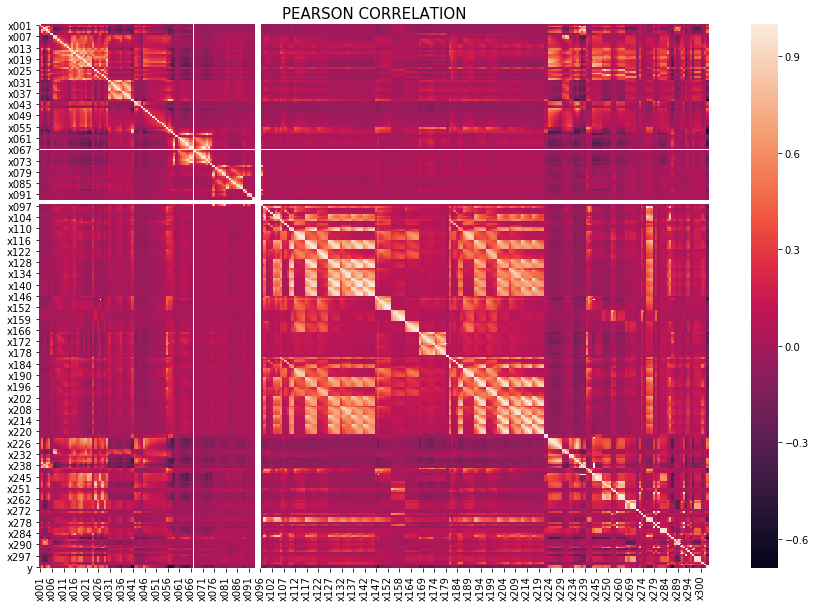

In [45]:
plt.figure(figsize = (15,10))
sns.heatmap(filtered_df.corr(method="pearson"))
plt.title('PEARSON CORRELATION', fontsize=15)

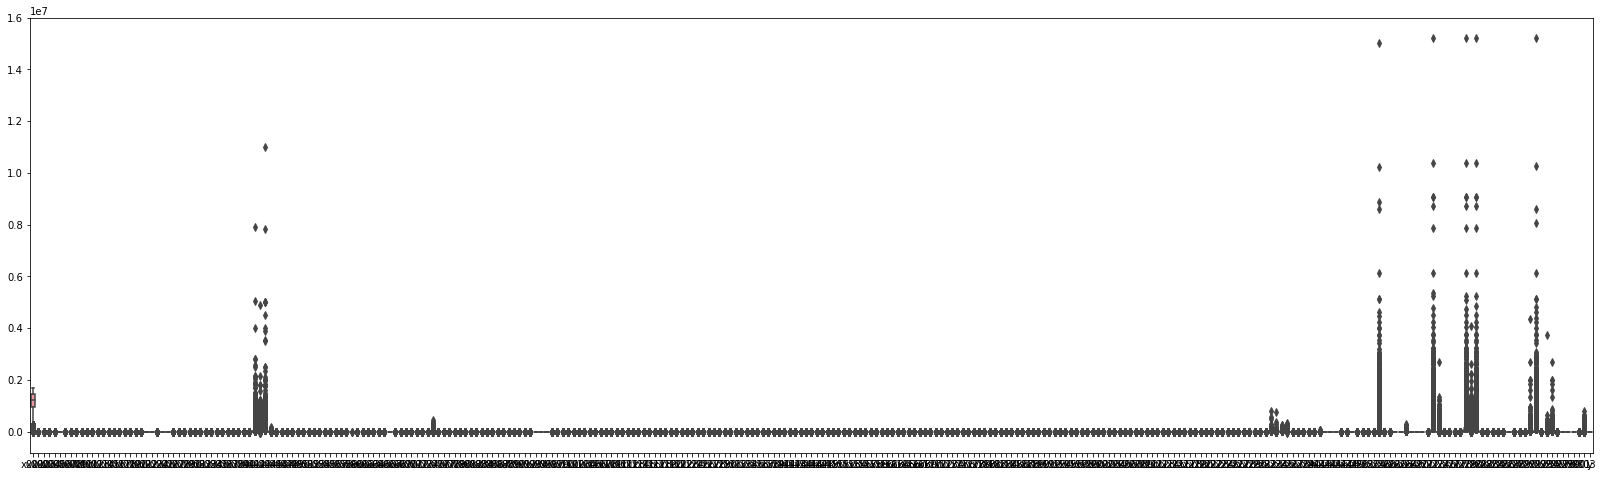

In [46]:
%matplotlib inline
plt.figure(figsize = (28,8))
sns.boxplot(data=filtered_df)

In [47]:
cor_target = abs(filtered_df.corr()["y"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target<0.3]
relevant_features

x001    0.164841
x003    0.121207
x006    0.092144
x007    0.008623
x008    0.021920
x009    0.001522
x010    0.043654
x011    0.113111
x012    0.117558
x013    0.178163
x016    0.194172
x021    0.242804
x024    0.059221
x026    0.212508
x029    0.217832
x031    0.280099
x032    0.077719
x033    0.112868
x034    0.191694
x035    0.254842
x037    0.091270
x038    0.125037
x039    0.216553
x040    0.291714
x042    0.293363
x044    0.212458
x045    0.145432
x048    0.195027
x049    0.137282
x050    0.096114
          ...   
x258    0.242880
x263    0.135366
x264    0.115238
x269    0.062478
x270    0.066774
x271    0.080832
x272    0.066761
x273    0.232696
x274    0.133154
x275    0.020511
x279    0.241646
x280    0.066670
x281    0.271768
x282    0.297334
x283    0.287514
x284    0.272775
x285    0.060160
x286    0.202476
x288    0.018680
x289    0.006531
x290    0.009339
x291    0.042159
x292    0.234469
x294    0.112354
x296    0.110278
x298    0.044329
x299    0.044871
x300    0.0403

In [48]:
relevant_features.item

<bound method IndexOpsMixin.item of x001    0.164841
x003    0.121207
x006    0.092144
x007    0.008623
x008    0.021920
x009    0.001522
x010    0.043654
x011    0.113111
x012    0.117558
x013    0.178163
x016    0.194172
x021    0.242804
x024    0.059221
x026    0.212508
x029    0.217832
x031    0.280099
x032    0.077719
x033    0.112868
x034    0.191694
x035    0.254842
x037    0.091270
x038    0.125037
x039    0.216553
x040    0.291714
x042    0.293363
x044    0.212458
x045    0.145432
x048    0.195027
x049    0.137282
x050    0.096114
          ...   
x258    0.242880
x263    0.135366
x264    0.115238
x269    0.062478
x270    0.066774
x271    0.080832
x272    0.066761
x273    0.232696
x274    0.133154
x275    0.020511
x279    0.241646
x280    0.066670
x281    0.271768
x282    0.297334
x283    0.287514
x284    0.272775
x285    0.060160
x286    0.202476
x288    0.018680
x289    0.006531
x290    0.009339
x291    0.042159
x292    0.234469
x294    0.112354
x296    0.110278
x298    0.04

In [49]:
lst_key=[]
null_key=[]
for i,j in relevant_features.items():
    lst_key.append(i)
#print(lst_key.count())

final_df=filtered_df.drop(columns=lst_key,axis=1)
print(final_df.shape)

(100000, 65)


In [50]:
a=final_df.isnull().any()==True

In [51]:
for i,j in a.items():
    if j==True:
        null_key.append(i)
print(null_key)
final_df=filtered_df.drop(columns=lst_key,axis=1)

['x002', 'x004', 'x005', 'x041', 'x057', 'x058', 'x148', 'x235', 'x237', 'x239', 'x287', 'x293', 'x297']


In [52]:
for i,j in a.items():
    if j==True:
        null_key.append(i)
print(null_key)

['x002', 'x004', 'x005', 'x041', 'x057', 'x058', 'x148', 'x235', 'x237', 'x239', 'x287', 'x293', 'x297', 'x002', 'x004', 'x005', 'x041', 'x057', 'x058', 'x148', 'x235', 'x237', 'x239', 'x287', 'x293', 'x297']


In [53]:
for i in null_key:
    final_df[i].fillna(final_df[i].mean(),inplace=True)
final_df.shape 

(100000, 65)

In [54]:
train_final = final_df[final_df.source=="train"]
test_final = final_df[final_df.source=="test"]

print(train_final.shape)
print(test_final.shape)

train_final.drop(columns="source",inplace=True)
test_final.drop(columns="source",inplace=True)

(80000, 65)
(20000, 65)


C:\Users\bhuji\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [56]:
X = train_final.drop("y", axis=1)
Y = train_final["y"]
print(X.shape)
print(Y.shape)

(80000, 63)
(80000,)


In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(X)
scaled_X = scaler.transform(X)

C:\Users\bhuji\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [58]:
from sklearn.model_selection import train_test_split

seed      = 42
test_size = 0.20

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = test_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(64000, 63)
(16000, 63)
(64000,)
(16000,)


In [62]:
!pip install xgboost

Linear: -39.966, 0.407
Lasso: -56.876, 0.532
Ridge: -40.016, 0.41
ElasticNet: -73.932, 0.537
DecisionTree: -34.954, 0.498
KNN: -38.358, 0.487


C:\Users\bhuji\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhuji\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhuji\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhuji\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhuji\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

RandomForest: -25.951, 0.32
AdaBoost: -43.48, 0.401
GradientBoost: -27.902, 0.275
[21:14:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\bhuji\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\bhuji\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:15:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\bhuji\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:15:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\bhuji\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:15:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\bhuji\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:16:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\bhuji\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:16:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\bhuji\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:17:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\bhuji\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:17:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\bhuji\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:17:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\bhuji\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:18:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost: -27.906, 0.252
Time taken for processing XGBoost: 0:18:12.087146


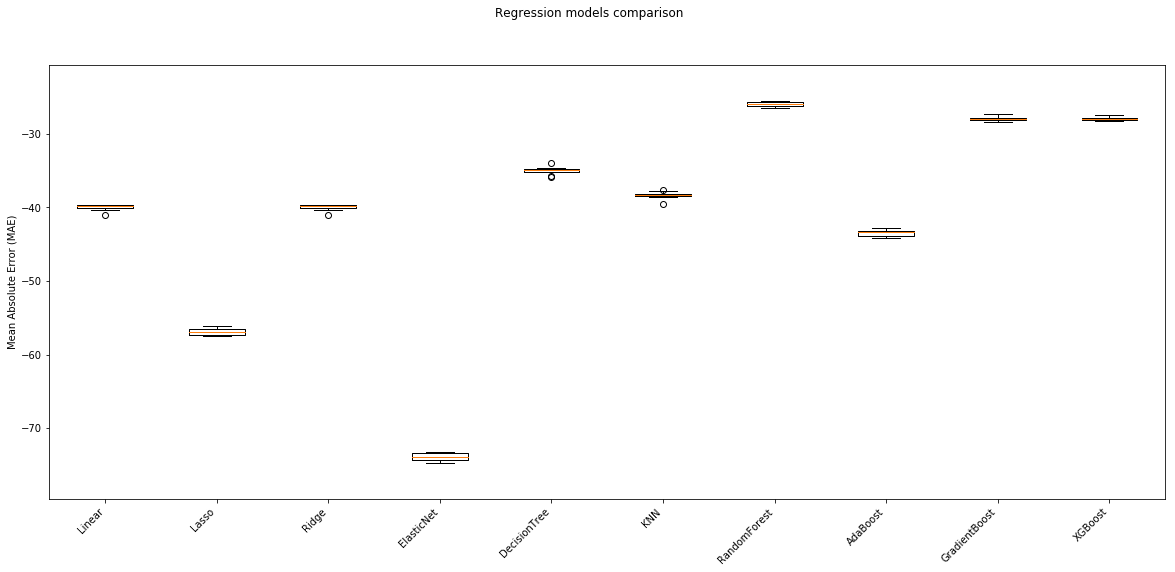

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import time
import datetime

start = 0
end = 0
start = time.time()

# user variables to tune
folds   = 10
metric  = "neg_mean_absolute_error"

models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["Ridge"]         = Ridge()
models["ElasticNet"]    = ElasticNet()
models["DecisionTree"]  = DecisionTreeRegressor()
models["KNN"]           = KNeighborsRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["XGBoost"] = XGBRegressor()

# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed)
    results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=metric)

    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))
    
    end = time.time()
list_lapse = end - start
print("Time taken for processing {}: {}".format(model_name, str(datetime.timedelta(seconds=list_lapse))))

# box-whisker plot to compare regression models
figure = plt.figure(figsize = (20,8))

figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Absolute Error (MAE)")
plt.margins(0.05, 0.1)